# Programa de Trainee Mottu - Case 2024

## RESOLUÇÃO DA QUESTÃO 2

O presente trabalho tem como objetivo realizar uma análise aprofundada dos dados de venda e aluguel de motos da empresa Mottu, com o intuito de responder à Questão 2 do case apresentado.

## Etapas do projeto:

- Coleta dos dados:
  1. Importar os pacotes e dataframe necessários
  2. Leitura do Arquivo
- Limpeza dos dados
- Criação de colunas para auxiliar nos cálculos
- Formulação das respostas

## Importando as bibliotecas necessárias

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando e visualizando a tabela de dados

In [64]:
df = pd.read_excel("Tabela_-_Case_Mottu_2024.xlsx")

In [65]:
display(df)

,Data,A/V,Estado,Valor de Entrada,Caução
0,2024-08-01,Aluguel,GO,NaN,700.0
1,2024-08-01,Aluguel,PR,NaN,500.0
2,2024-08-01,Venda,GO,2500.0,NaN
3,2024-08-01,Aluguel,AM,NaN,500.0
4,2024-08-01,Aluguel,BA,NaN,500.0
...,...,...,...,...,...
1999,2024-08-31,Aluguel,SC,NaN,500.0
2000,2024-08-31,Aluguel,BA,NaN,500.0
2001,2024-08-31,Aluguel,MT,NaN,500.0
2002,2024-08-31,Aluguel,AC,NaN,700.0


## Limpeza dos dados

Verificando se existem dados ausentes ou duplicados, e tratando-os adequadamente.

In [66]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

# Eliminar duplicatas
df = df.drop_duplicates()

Data                   0
A/V                    0
Estado                 0
Valor de Entrada    1226
Caução               778
dtype: int64
Número de duplicados: 822


Em relação a coluna Valor de Entrada, observando o dataframe, todos os valorores ausentes estão ligados a alugueis, nesse  caso, vamos preencher com 0, indicando que não houve uma entrada de grande valor como na venda.

In [67]:
df['Valor de Entrada'] = df['Valor de Entrada'].fillna(0)

Em relação a coluna Caução, no meu entender, valores ausentes correspondem a casos em que o Caução não foi cobrada ou não aplicada, sendo assim, vou preencher com 0 , indicando que a transação não teve Caução.

In [68]:
df['Caução'] = df['Caução'].fillna(0)

Reavaliando a tabela

In [69]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar valores duplicados
print(df.duplicated().sum())

Data                0
A/V                 0
Estado              0
Valor de Entrada    0
Caução              0
dtype: int64
0


In [70]:
display(df)

,Data,A/V,Estado,Valor de Entrada,Caução
0,2024-08-01,Aluguel,GO,0.0,700.0
1,2024-08-01,Aluguel,PR,0.0,500.0
2,2024-08-01,Venda,GO,2500.0,0.0
3,2024-08-01,Aluguel,AM,0.0,500.0
4,2024-08-01,Aluguel,BA,0.0,500.0
...,...,...,...,...,...
1998,2024-08-31,Aluguel,RN,0.0,700.0
2000,2024-08-31,Aluguel,BA,0.0,500.0
2001,2024-08-31,Aluguel,MT,0.0,500.0
2002,2024-08-31,Aluguel,AC,0.0,700.0


## Criando colunas para auxiliar nos cálculos
Vamos adicionar a coluna Forma de Pagamento que distingue se o pagamento foi à vista ou parcelado.

In [71]:
# Adiciona uma coluna que calcula se o pagamento foi à vista ou parcelado
df['Forma de Pagamento'] = np.where((df['Valor de Entrada'] == 2000) | (df['Caução'] == 500), 'avista', 'parcelado')

In [72]:
display(df)

,Data,A/V,Estado,Valor de Entrada,Caução,Forma de Pagamento
0,2024-08-01,Aluguel,GO,0.0,700.0,parcelado
1,2024-08-01,Aluguel,PR,0.0,500.0,avista
2,2024-08-01,Venda,GO,2500.0,0.0,parcelado
3,2024-08-01,Aluguel,AM,0.0,500.0,avista
4,2024-08-01,Aluguel,BA,0.0,500.0,avista
...,...,...,...,...,...,...
1998,2024-08-31,Aluguel,RN,0.0,700.0,parcelado
2000,2024-08-31,Aluguel,BA,0.0,500.0,avista
2001,2024-08-31,Aluguel,MT,0.0,500.0,avista
2002,2024-08-31,Aluguel,AC,0.0,700.0,parcelado


## a)
## Análise da performance das filiais
Calculando o total de vendas e aluguéis por filial e criando um ranking de performance.

In [73]:
# Agrupar por Estado e calcular o total de vendas e alugueis
performance_filiais = df.groupby('Estado')['Valor de Entrada'].count().reset_index()

# Renomear a coluna de contagem
performance_filiais.columns = ['Estado', 'Total de Transacoes']

# Ordenar as filiais (Estados) por melhor desempenho
performance_filiais = performance_filiais.sort_values(by='Total de Transacoes', ascending=False)

display(performance_filiais)

,Estado,Total de Transacoes
25,SP,96
23,SC,91
15,PE,91
10,MG,81
4,BA,72
17,PR,66
1,AL,63
22,RS,56
13,PA,43
7,ES,43


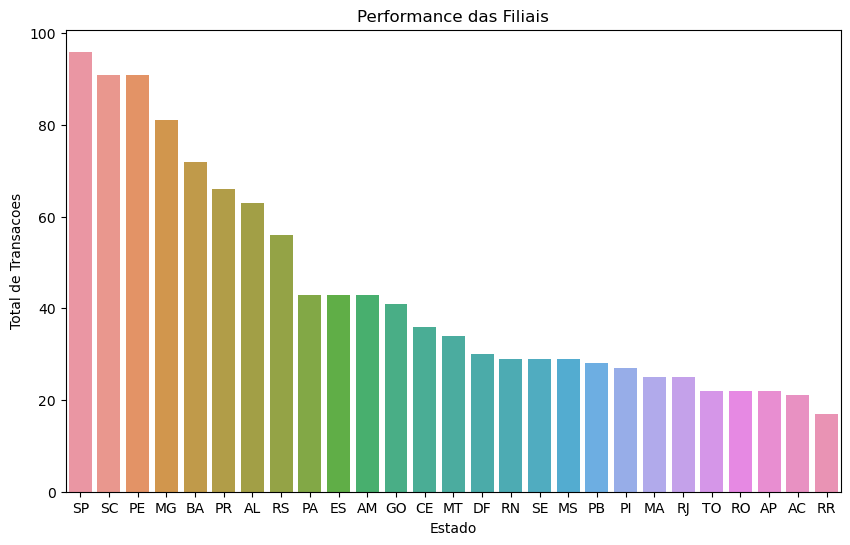

In [74]:
# Gráfico de barras para desempenho de filiais
plt.figure(figsize=(10,6))
sns.barplot(data=performance_filiais, x='Estado', y='Total de Transacoes')
plt.title('Performance das Filiais')
plt.show()

## b)
## Calculando o faturamento mensal
Considerando que o faturamento mensal de uma moto é o mesmo no aluguel e na venda, podemos calcular o faturamento de cada filial.

In [75]:
# Criar uma coluna com o valor mensal faturado (igual para aluguel e venda)
df['Faturamento Mensal'] = np.where(df['Forma de Pagamento'] == 'venda', 2000, 500)

# Agrupar por filial e somar o faturamento
faturamento_filiais = df.groupby('Estado')['Faturamento Mensal'].sum().reset_index()

# Ordenar por faturamento
faturamento_filiais = faturamento_filiais.sort_values(by='Faturamento Mensal', ascending=False)

display(faturamento_filiais)

,Estado,Faturamento Mensal
25,SP,48000
23,SC,45500
15,PE,45500
10,MG,40500
4,BA,36000
17,PR,33000
1,AL,31500
22,RS,28000
13,PA,21500
7,ES,21500


## C)
## I. Separação da tabela
Neste trabalho, optamos por separar a tabela em duas — uma para vendas e outra para aluguel — pois isso pode ser benéfico para realização de análises específicas para cada tipo de transação. Isso é útil, pois as métricas de venda e aluguel podem variar bastante em termos de receita, comportamento de pagamento, retenção, entre outros. Ao dividir as tabelas, nós temos:

- Mais clareza para identificar tendências e anomalias em cada tipo de transação.
- Facilidade na aplicação de regras específicas para cada um dos serviços, como regras de faturamento e parcelamento, que são diferentes entre aluguel e venda.
- Melhor organização para análises futuras, possibilitando o acompanhamento de diferentes KPIs sem sobrecarregar uma única tabela com muitos filtros.

In [76]:
# Tabela de vendas
tabela_vendas = df[df['A/V'] == 'Venda']

# Tabela de aluguel
tabela_aluguel = df[df['A/V'] == 'Aluguel']

### Tabela Vendas

In [77]:
display(tabela_vendas)

,Data,A/V,Estado,Valor de Entrada,Caução,Forma de Pagamento,Faturamento Mensal
2,2024-08-01,Venda,GO,2500.0,0.0,parcelado,500
5,2024-08-01,Venda,SC,2500.0,0.0,parcelado,500
8,2024-08-01,Venda,BA,2000.0,0.0,avista,500
10,2024-08-01,Venda,AM,2500.0,0.0,parcelado,500
13,2024-08-01,Venda,PE,2500.0,0.0,parcelado,500
...,...,...,...,...,...,...,...
1973,2024-08-31,Venda,ES,2500.0,0.0,parcelado,500
1975,2024-08-31,Venda,SC,2000.0,0.0,avista,500
1977,2024-08-31,Venda,MG,2000.0,0.0,avista,500
1979,2024-08-31,Venda,PR,2500.0,0.0,parcelado,500


### Tabela Aluguel

In [78]:
display(tabela_aluguel)

,Data,A/V,Estado,Valor de Entrada,Caução,Forma de Pagamento,Faturamento Mensal
0,2024-08-01,Aluguel,GO,0.0,700.0,parcelado,500
1,2024-08-01,Aluguel,PR,0.0,500.0,avista,500
3,2024-08-01,Aluguel,AM,0.0,500.0,avista,500
4,2024-08-01,Aluguel,BA,0.0,500.0,avista,500
6,2024-08-01,Aluguel,PE,0.0,700.0,parcelado,500
...,...,...,...,...,...,...,...
1995,2024-08-31,Aluguel,MG,0.0,650.0,parcelado,500
1998,2024-08-31,Aluguel,RN,0.0,700.0,parcelado,500
2000,2024-08-31,Aluguel,BA,0.0,500.0,avista,500
2001,2024-08-31,Aluguel,MT,0.0,500.0,avista,500


## II. Criação do funil de vendas

O funil de vendas é fundamental para mapear a jornada do cliente desde a primeira interação com a Mottu até a finalização da venda ou aluguel da moto.

#### Mapeamento do Funil de Vendas
O funil de vendas é uma sequência de etapas pelas quais o cliente passa, desde o interesse inicial até a concretização da transação. No caso da Mottu, o funil pode ser dividido da seguinte forma:

1. Visita ao site ou app: O cliente entra em contato com a marca, visualizando as motos disponíveis para venda ou aluguel. Nesta fase, o objetivo é atrair a atenção do cliente.

2. Cadastro no app: Uma vez interessado, o cliente se cadastra na plataforma, fornecendo suas informações pessoais e de contato. Essa é uma etapa crucial para capturar leads.

3. Solicitação de moto: Após o cadastro, o cliente solicita a compra ou o aluguel da moto. É nesta etapa que as decisões de compra começam a tomar forma.

4. Pagamento inicial: O cliente realiza o pagamento da entrada para venda ou da caução no aluguel. Esta etapa confirma o compromisso financeiro do cliente.

5. Retirada da moto: Após o pagamento inicial, o cliente retira a moto na filial. Para as vendas, isso ocorre após o pagamento completo da entrada; para os aluguéis, basta a primeira parcela do aluguel e da caução.

In [79]:
# Etapas do funil de vendas
funil = ['Visita ao site ou app', 'Cadastro no app', 'Solicitação de moto', 'Pagamento inicial', 'Retirada da moto']

In [80]:
print(funil)

['Visita ao site ou app', 'Cadastro no app', 'Solicitação de moto', 'Pagamento inicial', 'Retirada da moto']


## d)
## Taxa de desistência ou inadimplência
Um ponto adicional pode ser a análise da taxa de desistência ou inadimplência no pagamento das parcelas, além da análise de sazonalidade (meses com mais vendas ou aluguéis).

O código abaixo calcula a proporção de desistências e inadimplencia entre os contratos e imprime o resultado em porcentagem, facilitando a interpretação da taxa de desistência dos contratos de aluguel.
Duas novas coluna chamadas 'desistiu' e 'inadimplente' são criadas no DataFrame df. Após o código verificar a condição preestabelecida, ele acrescentará '0' indicando que o contrato foi concluído ou '1' indicando desistencia ou inadimplencia.

In [ ]:
# Analisar desistências de aluguel
df['desistiu'] = np.where(df['status do contrato'] == 'desistência', 1, 0)
taxa_desistencia = df['desistiu'].mean()

print(f"Taxa de desistência: {taxa_desistencia * 100:.2f}%")

# Analisar inadimplência
df['inadimplente'] = np.where(df['status do pagamento'] == 'inadimplente', 1, 0)
taxa_inadimplencia = df['inadimplente'].mean()

print(f"Taxa de inadimplência: {taxa_inadimplencia * 100:.2f}%")